# Part II - Effects of Loan's and Borrowers' Characteristics on The Loan Status
## by Manuk Mikayelyan

## Investigation Overview
> In this investigation, we wanted to look at the characteristics of loans and borrowers that could be used to predict the loan status. The main focus will be on employements status, dept to Income ratio, prosper rating, recommedations, and loan amount.
## Dataset Overview
> This dataset contains information regarding 113937 prosper loan data which includes loan status and other attributes such as borrower rate (or interest rate), employment status, recommendations count, borrower income, and many others. The dataset was subset for only values of loan status that includes Completed, Defaulted or chargedOff. 871 duplicate records have been identified and drouped out from the dataset.

In [1]:
# Set the working directory
import os

# Fill in the the working directory and remove the '##' symbols from the beginning of below row to make the code work
## os.chdir(r'C:\Users\.................................\Communicate Data Findings Project')
os.getcwd()

'C:\\Users\\manuk\\OneDrive\\Desktop\\MasterSchool_final\\DA_111_EDA\\Communicate Data Findings Project'

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [4]:
# Create a sub-dataset keeping only the main features
key_features = ['LoanStatus', 'Term', 'BorrowerAPR', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'Occupation', 
                'EmploymentStatus', 'IncomeRange', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'DebtToIncomeRatio', 
                'LoanOriginalAmount', 'ListingCategory (numeric)', 'Recommendations', 'CreditGrade', 'LoanNumber',
                'ListingKey', 'LoanOriginationDate', 'LoanOriginationQuarter', 'Recommendations']

sub_loan = loan[key_features]

In [5]:
# Creating a copy of the original dataframe
sub_loan_clean = sub_loan.copy()

In [6]:
# Drop the duplicate records from the dataframe
sub_loan_clean = sub_loan_clean.drop_duplicates()

# Check the resluts
assert not sub_loan_clean.duplicated().any()

In [7]:
# Changing ListingCategory (numeric) and ProsperRating (Alpha) column names
sub_loan_clean = sub_loan_clean.rename(columns = {'ListingCategory (numeric)': 'ListingCategory', 
                                                  'ProsperRating (Alpha)': 'ProsperRatingCat',
                                                 'ProsperRating (numeric)':'ProsperRatingNum'})

# Check the resluts
for col_name in ['ListingCategory', 'ProsperRatingCat','ProsperRatingNum']:
    assert col_name in sub_loan_clean.columns


In [8]:
# Map the ListingCategory column to the right category titles
category_lisitng = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
                   4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 
                   9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
                  13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical or Dental', 16 : 'Motorcycle',
                  17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

sub_loan_clean.ListingCategory = sub_loan_clean.ListingCategory.map(category_lisitng)

# Check the results
sub_loan_clean.ListingCategory.unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical or Dental', 'Wedding Loans', 'Vacation', 'Business',
       'Taxes', 'Baby & Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

In [9]:
# Create a new column ProsperRating merging ProsperRatingCat and CreditGrade columns. Thus we will not be forced to drop too  
# many observations due to missing data
sub_loan_clean['ProsperRating'] = sub_loan_clean['ProsperRatingCat']
sub_loan_clean['ProsperRating'] = np.where(
                                    ((sub_loan_clean['ProsperRatingCat'].isnull()) & (sub_loan_clean['CreditGrade'].notnull())),
                                    sub_loan_clean['CreditGrade'],
                                    sub_loan_clean['ProsperRatingCat']
                                )
# Check the resluts
sub_loan_clean[['ProsperRatingCat','CreditGrade','ProsperRating']].sample(10)

,ProsperRatingCat,CreditGrade,ProsperRating
96342,A,NaN,A
81460,E,NaN,E
19844,NaN,AA,AA
79382,NaN,HR,HR
73561,C,NaN,C
27012,NaN,D,D
38171,D,NaN,D
112252,NaN,E,E
43488,AA,NaN,AA
11721,B,NaN,B


In [10]:
# ProsperRating column incorporates the information of the columns ProsperRatingCat,CreditGrade, and ProsperRatingNum, so we 
# are going to drop them
sub_loan_clean.drop(['ProsperRatingCat','CreditGrade','ProsperRatingNum'],axis = 1, inplace=True)

# Check the resluts
list(sub_loan_clean.columns.values)

['LoanStatus',
 'Term',
 'BorrowerAPR',
 'Occupation',
 'EmploymentStatus',
 'IncomeRange',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'DebtToIncomeRatio',
 'LoanOriginalAmount',
 'ListingCategory',
 'Recommendations',
 'LoanNumber',
 'ListingKey',
 'LoanOriginationDate',
 'LoanOriginationQuarter',
 'Recommendations',
 'ProsperRating']

In [11]:
# Convert LoanOriginationDate to DateTime object
sub_loan_clean.LoanOriginationDate = pd.to_datetime(sub_loan_clean.LoanOriginationDate)

# Check the resluts
sub_loan_clean.LoanOriginationDate.info()

<class 'pandas.core.series.Series'>
Int64Index: 113066 entries, 0 to 113936
Series name: LoanOriginationDate
Non-Null Count   Dtype         
--------------   -----         
113066 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.7 MB


In [12]:
# Convert ProsperRating and IncomeRange columns to ordered categorical types
# Check the unique values
print(sub_loan_clean.ProsperRating.unique())
print(sub_loan_clean.IncomeRange.unique())

['C' 'A' 'HR' 'D' 'B' 'E' 'AA' nan 'NC']
['$25,000-49,999' '$50,000-74,999' 'Not displayed' '$100,000+'
 '$75,000-99,999' '$1-24,999' 'Not employed' '$0']


In [13]:
# Replace 'Not employed' entries in IncomeRange with $0
sub_loan_clean.IncomeRange = sub_loan_clean.IncomeRange.str.replace('Not employed', '$0')

# Check the resluts
print(sub_loan_clean.IncomeRange.unique())

['$25,000-49,999' '$50,000-74,999' 'Not displayed' '$100,000+'
 '$75,000-99,999' '$1-24,999' '$0']


In [14]:
# Store the correct variable orders in a dictionary
order_dict = {'ProsperRating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
              'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', 
                              '$50,000-74,999', '$75,000-99,999', '$100,000+']}

# Assign each column to the proper order
for key, value in order_dict.items():
    correct_order = pd.api.types.CategoricalDtype(categories=value, ordered=True)
    sub_loan_clean[key] = sub_loan_clean[key].astype(correct_order)

# Check the resluts
sub_loan_clean[order_dict.keys()].dtypes

ProsperRating    category
IncomeRange      category
dtype: object

In [15]:
# As per the variable, the proportion of null values is not so high so we are going to drop all the null values from the dataset
sub_loan_clean = sub_loan_clean.dropna()

# Check the result 
sub_loan_clean.isnull().sum()

LoanStatus                  0
Term                        0
BorrowerAPR                 0
Occupation                  0
EmploymentStatus            0
IncomeRange                 0
EmploymentStatusDuration    0
IsBorrowerHomeowner         0
DebtToIncomeRatio           0
LoanOriginalAmount          0
ListingCategory             0
Recommendations             0
LoanNumber                  0
ListingKey                  0
LoanOriginationDate         0
LoanOriginationQuarter      0
Recommendations             0
ProsperRating               0
dtype: int64

In [16]:
# Drop out Recommendations duplicated column
sub_loan_clean = sub_loan_clean.loc[:,~sub_loan_clean.T.duplicated(keep='last')]

# Check the result
sub_loan_clean.head(2)

,LoanStatus,Term,BorrowerAPR,Occupation,EmploymentStatus,IncomeRange,EmploymentStatusDuration,IsBorrowerHomeowner,DebtToIncomeRatio,LoanOriginalAmount,ListingCategory,LoanNumber,ListingKey,LoanOriginationDate,LoanOriginationQuarter,Recommendations,ProsperRating
0,Completed,36,0.16516,Other,Self-employed,"$25,000-49,999",2.0,True,0.17,9425,Not Available,19141,1021339766868145413AB3B,2007-09-12,Q3 2007,0,C
1,Current,36,0.12016,Professional,Employed,"$50,000-74,999",44.0,False,0.18,10000,Home Improvement,134815,10273602499503308B223C1,2014-03-03,Q1 2014,0,A


## Loan portfolio distribution by loan status
> The vast majority of lones belong to `Completed` category (over 71.12% of records). `Charged off` loans also have a notable share (around 21.8% of records) followed by `Defaulted` (about 7.08%).

In [17]:
# Merge Past Due loans 
sub_loan_clean.loc[sub_loan_clean['LoanStatus'].str.contains('Past Due '), 'LoanStatus'] = 'Past Due'

In [18]:
# Set dtype of 'LoanStatus' to category
loanstatus_order = sub_loan_clean['LoanStatus'].value_counts().index
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = loanstatus_order)
sub_loan_clean['LoanStatus'] = sub_loan_clean['LoanStatus'].astype(ordered_var)

In [19]:
# Merge Past Due loans 
df = sub_loan_clean

df.loc[df['LoanStatus'].str.contains('Past Due '), 'LoanStatus'] = 'Past Due'


# Set dtype of 'LoanStatus' to category
loanstatus_order1 = ["Defaulted", "Chargedoff", "Completed"]
ordered_var1 = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = loanstatus_order1)
df['LoanStatus'] = df['LoanStatus'].astype(ordered_var1)

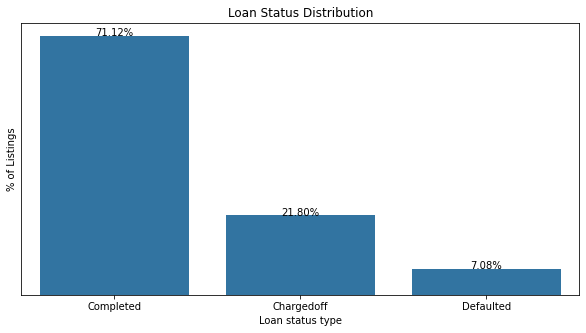

In [20]:
# Subset the dataframe
df = df.drop(df[df.LoanStatus.isin(["Current", "Past Due", "FinalPaymentInProgress","Cancelled"])].index)


# Print the proportion below the bars 
plt.figure(figsize=[10, 5])

n_loans=df['LoanStatus'].value_counts().sum()
status_count=df['LoanStatus'].value_counts()
status_order=status_count.index

base_color = sb.color_palette()[0]
sb.countplot(data=df, x='LoanStatus', color=base_color, order=status_order);

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=0) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = status_count[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/n_loans)

    # print the annotation just below the top of the bar
    
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    plt.ylabel('% of Listings')
    plt.yticks([])
    plt.xlabel('Loan status type')
    plt.title('Loan Status Distribution');

## Distribution of ProsperRating
> The ratings of most of the borrowers are among D to A, with the most common rating belonging to the C category. Listings with very high prosper ratings (AA) are the least common.

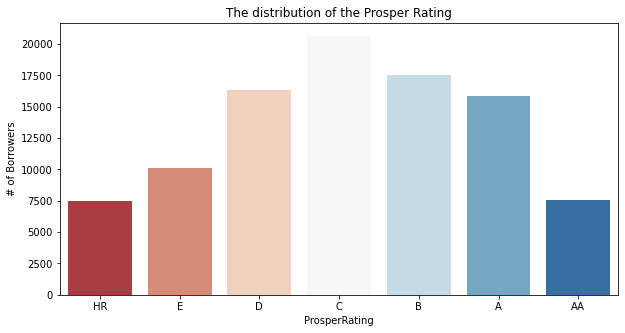

In [21]:
plt.figure(figsize=[10, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = sub_loan_clean, x = 'ProsperRating', color = base_color, palette = "RdBu")
plt.ylabel('# of Borrowers')
plt.title('The distribution of the Prosper Rating');

## Distribution of Debt-to-Income ratio
> The distribution of Debt-to-Income ratio is right skewed. Most borrowers who apply for a loan have a debt to income ratio around 20%. There are some drops in counts as the ratio approaches 0.4 and 0.6.

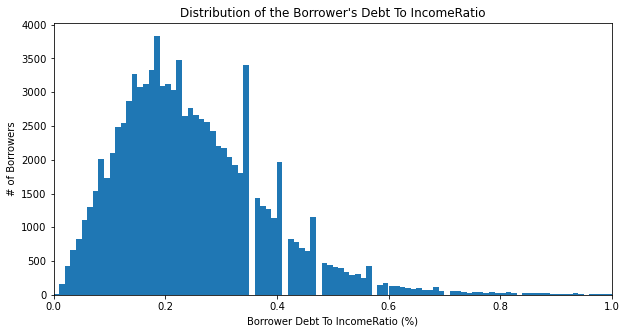

In [22]:
# Plot the distribution of the DebtToIncomeRatio 
rate_bins = np.arange(sub_loan_clean.DebtToIncomeRatio.min(), sub_loan_clean.DebtToIncomeRatio.max()+0.01, 0.01)

plt.figure(figsize = [10, 5])

plt.hist(data=sub_loan_clean, x='DebtToIncomeRatio', bins=rate_bins)
plt.xlabel('Borrower Debt To IncomeRatio (%)');
plt.ylabel('# of Borrowers')
plt.title("Distribution of the Borrower's Debt To IncomeRatio")
plt.xlim(0,1);

## Distribution of IncomeRange
> The vast majority of the borrowers have income in the range 25K-75K.

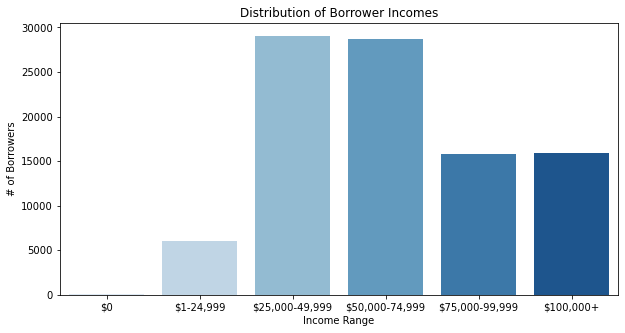

In [23]:
plt.figure(figsize = [10, 5])
sb.countplot(data = sub_loan_clean, x = 'IncomeRange', palette = "Blues")
plt.xlabel('Income Range')
plt.ylabel('# of Borrowers')
plt.title('Distribution of Borrower Incomes');

## Recommendations by Loan Status
> Most of the people granted loans have less than ten recommendations count for completed, defaulted and chargedoff status. At the same time there are more completed loans with recommendations more than 10 than there are for defaulted and charged off.

In [24]:
# Subset the dataframe
sub_loan_clean = sub_loan_clean.drop(sub_loan_clean[sub_loan_clean.LoanStatus.isin(["Current", "Past Due", "FinalPaymentInProgress","Cancelled"])].index)

# Set dtype of 'LoanStatus' to category
loanstatus_order = ["Defaulted", "Chargedoff", "Completed"]
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = loanstatus_order)
sub_loan_clean['LoanStatus'] = sub_loan_clean['LoanStatus'].astype(ordered_var)

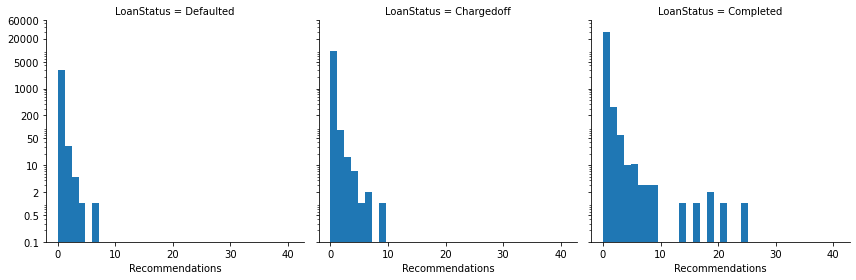

In [25]:
order=sub_loan_clean.LoanStatus.unique()
bins = np.arange(0, 40+1.2, 1.2)
yticks= [0.1, 0.5, 2, 10, 50, 200, 1000, 5000, 20000, 60000]
g=sb.FacetGrid(data=sub_loan_clean, col='LoanStatus', height=4)
g.map(plt.hist, 'Recommendations', bins=bins)
g.set(yscale='log', yticks=yticks, yticklabels=yticks);

## BorrowerAPR and ProsperRating by Loan Status
> Borrowers with high ratings receive loans at lower interest rates and also have a lower risk of default.
Among defaulted AA borrowers, the default rate was higher compared to ChargedOff and Completed categories.

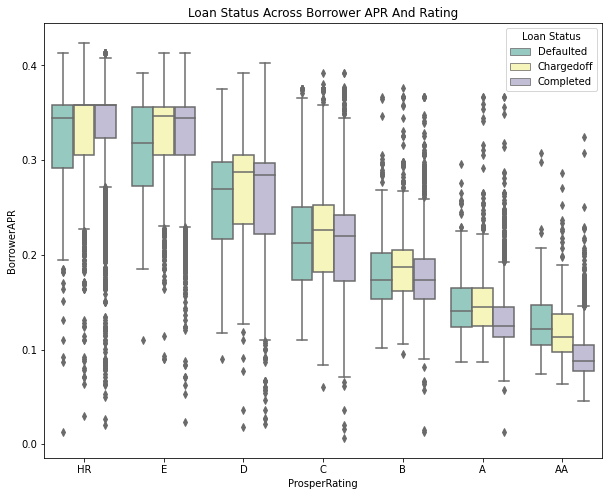

In [26]:
fig = plt.figure(figsize = [10, 8])
ax = sb.boxplot(x='ProsperRating', y='BorrowerAPR', hue='LoanStatus',
                 data=sub_loan_clean, palette="Set3")
plt.title('Loan Status Across Borrower APR And Rating')
plt.legend(title = 'Loan Status');

## Loan Original Amount and ProsperRating by Loan Status
> Borrowers with high ratings receive greater amount of loans for which the risk of default is higher as well.

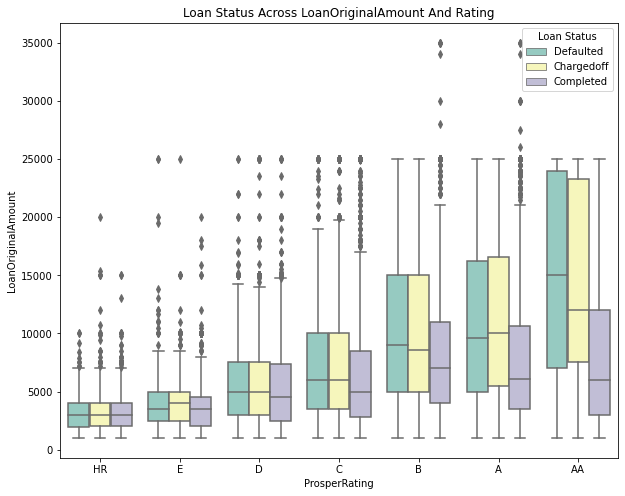

In [27]:
fig = plt.figure(figsize = [10, 8])
ax = sb.boxplot(x='ProsperRating', y='LoanOriginalAmount', hue='LoanStatus',
                 data=sub_loan_clean, palette="Set3")
plt.title('Loan Status Across LoanOriginalAmount And Rating')
plt.legend(title = 'Loan Status');
#ax.set_ylim(0, 2);

## Loan Original Amount and BorrowerAPR by Loan Status
> The relationship between the three variables is the following - borrowers who defaulted take small loans at higher percentage rates.

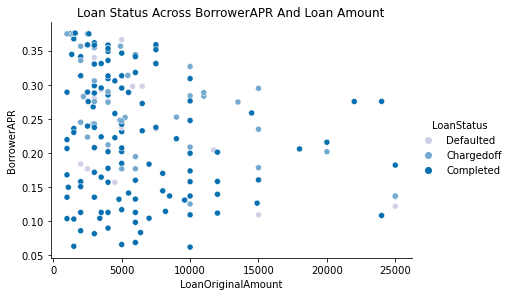

In [28]:
# Visualize interactions with a seaborn relplot
sb.relplot(data=sub_loan_clean.sample(400, random_state=1), y='BorrowerAPR', x='LoanOriginalAmount', 
            hue='LoanStatus', palette='PuBu', height=4, aspect=1.5)

plt.title('Loan Status Across BorrowerAPR And Loan Amount');

## Employment Status and Listing Category by Loan Status
> Those borrowers who are fully employed seem to borrow for a wide range of reasons with some having equal chances of being charged off or defaulted as they have of being completed. Those borrowers who are not employed or part-time employed seem to mainly borrow for a study, dept consolidation reasons again having equal chances of being charged off or defaulted as they have of being completed.

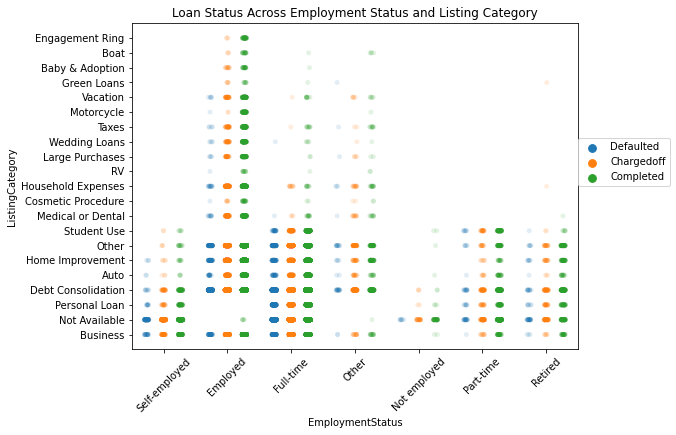

In [29]:
fig, ax = plt.subplots(nrows=1, figsize=(8, 6))
sb.stripplot(data=sub_loan_clean, y='ListingCategory', x='EmploymentStatus',
             hue='LoanStatus', jitter=True, ax=ax, dodge= 0.7, alpha=1/8)
plt.xticks(rotation=45)
plt.legend(loc=(1,0.5))
plt.title('Loan Status Across Employment Status and Listing Category');

## Employment Status and Recommendations by Loan Status
> Those borrowers who have fulltime employment have more recommendations than those in other categories with them also completing their loans.

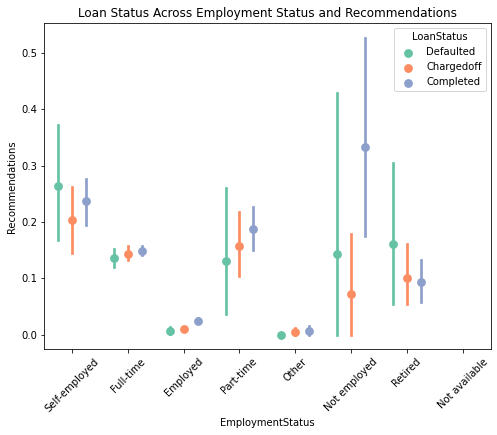

In [30]:
y_order = ['Self-employed', 'Full-time', 'Employed', 'Part-time', 'Other', 'Not employed', 'Retired', 'Not available']
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
sb.pointplot(x='EmploymentStatus', y='Recommendations', data=sub_loan_clean, 
             hue='LoanStatus', ax=ax, join=False, dodge=0.5, order=y_order, palette='Set2')
plt.xticks(rotation=45)
plt.title('Loan Status Across Employment Status and Recommendations');

In [ ]:
!jupyter nbconvert Project_ProsperLoan_Part2.ipynb --to slides --post serve --no-input --no-prompt